# 收入增长与房价增长对比
1. 有一个传说，程序员的收入是跟房价一起增长的，那么我们拿历史数据来分析一下吧。
2. 收入数据来自国家统计局官网 www.stats.gov.cn

In [7]:
#加载收入数据
import pandas as pd
income = pd.read_csv('otherdata/收入数据.csv', index_col = 0)
income.index = [x[:-1] for x in income.index]
income

,城镇单位就业人员平均工资(元),农、林、牧、渔业城镇单位就业人员平均工资(元),采矿业城镇单位就业人员平均工资(元),制造业城镇单位就业人员平均工资(元),电力、燃气及水的生产和供应业城镇单位就业人员平均工资(元),建筑业城镇单位就业人员平均工资(元),交通运输、仓储和邮政业城镇单位就业人员平均工资(元),信息传输、计算机服务和软件业城镇单位就业人员平均工资(元),批发和零售业城镇单位就业人员平均工资(元),住宿和餐饮业城镇单位就业人员平均工资(元),金融业城镇单位就业人员平均工资(元),房地产业城镇单位就业人员平均工资(元),租赁和商务服务业城镇单位就业人员平均工资(元),科学研究、技术服务和地质勘查业城镇单位就业人员平均工资(元),水利、环境和公共设施管理业城镇单位就业人员平均工资(元),居民服务和其他服务业城镇单位就业人员平均工资(元),教育城镇单位就业人员平均工资(元),卫生、社会保障和社会福利业城镇单位就业人员平均工资(元),文化、体育和娱乐业城镇单位就业人员平均工资(元),公共管理和社会组织城镇单位就业人员平均工资(元)
1999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000,9333.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001,10834.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002,12373.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003,13969.0,6884.0,13627.0,12671.0,18574.0,11328.0,15753.0,30897.0,10894.0,11198.0,20780.0,17085.0,17020.0,20442.0,11774.0,12665.0,14189.0,16185.0,17098.0,15355.0
2004,15920.0,7497.0,16774.0,14251.0,21543.0,12578.0,18071.0,33449.0,13012.0,12618.0,24299.0,18467.0,18723.0,23351.0,12884.0,13680.0,16085.0,18386.0,20522.0,17372.0
2005,18200.0,8207.0,20449.0,15934.0,24750.0,14112.0,20911.0,38799.0,15256.0,13876.0,29229.0,20253.0,21233.0,27155.0,14322.0,15747.0,18259.0,20808.0,22670.0,20234.0
2006,20856.0,9269.0,24125.0,18225.0,28424.0,16164.0,24111.0,43435.0,17796.0,15236.0,35495.0,22238.0,24510.0,31644.0,15630.0,18030.0,20918.0,23590.0,25847.0,22546.0
2007,24721.0,10847.0,28185.0,21144.0,33470.0,18482.0,27903.0,47700.0,21074.0,17046.0,44011.0,26085.0,27807.0,38432.0,18383.0,20370.0,25908.0,27892.0,30430.0,27731.0
2008,28898.0,12560.0,34233.0,24404.0,38515.0,21223.0,32041.0,54906.0,25818.0,19321.0,53897.0,30118.0,32915.0,45512.0,21103.0,22858.0,29831.0,32185.0,34158.0,32296.0


In [2]:
import pandas as pd
income=pd.read_html('otherdata/收入数据2020.htm')
income=income[0]
income = income.set_index('指标').T
income.index = [x[:-1] for x in income.index]
income = income.sort_index()
income

指标,城镇单位就业人员平均工资(元),农、林、牧、渔业城镇单位就业人员平均工资(元),采矿业城镇单位就业人员平均工资(元),制造业城镇单位就业人员平均工资(元),电力、燃气及水的生产和供应业城镇单位就业人员平均工资(元),建筑业城镇单位就业人员平均工资(元),交通运输、仓储和邮政业城镇单位就业人员平均工资(元),信息传输、计算机服务和软件业城镇单位就业人员平均工资(元),批发和零售业城镇单位就业人员平均工资(元),住宿和餐饮业城镇单位就业人员平均工资(元),金融业城镇单位就业人员平均工资(元),房地产业城镇单位就业人员平均工资(元),租赁和商务服务业城镇单位就业人员平均工资(元),科学研究、技术服务和地质勘查业城镇单位就业人员平均工资(元),水利、环境和公共设施管理业城镇单位就业人员平均工资(元),居民服务和其他服务业城镇单位就业人员平均工资(元),教育城镇单位就业人员平均工资(元),卫生、社会保障和社会福利业城镇单位就业人员平均工资(元),文化、体育和娱乐业城镇单位就业人员平均工资(元),公共管理和社会组织城镇单位就业人员平均工资(元)
2000,9333.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001,10834.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002,12373.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003,13969.0,6884.0,13627.0,12671.0,18574.0,11328.0,15753.0,30897.0,10894.0,11198.0,20780.0,17085.0,17020.0,20442.0,11774.0,12665.0,14189.0,16185.0,17098.0,15355.0
2004,15920.0,7497.0,16774.0,14251.0,21543.0,12578.0,18071.0,33449.0,13012.0,12618.0,24299.0,18467.0,18723.0,23351.0,12884.0,13680.0,16085.0,18386.0,20522.0,17372.0
2005,18200.0,8207.0,20449.0,15934.0,24750.0,14112.0,20911.0,38799.0,15256.0,13876.0,29229.0,20253.0,21233.0,27155.0,14322.0,15747.0,18259.0,20808.0,22670.0,20234.0
2006,20856.0,9269.0,24125.0,18225.0,28424.0,16164.0,24111.0,43435.0,17796.0,15236.0,35495.0,22238.0,24510.0,31644.0,15630.0,18030.0,20918.0,23590.0,25847.0,22546.0
2007,24721.0,10847.0,28185.0,21144.0,33470.0,18482.0,27903.0,47700.0,21074.0,17046.0,44011.0,26085.0,27807.0,38432.0,18383.0,20370.0,25908.0,27892.0,30430.0,27731.0
2008,28898.0,12560.0,34233.0,24404.0,38515.0,21223.0,32041.0,54906.0,25818.0,19321.0,53897.0,30118.0,32915.0,45512.0,21103.0,22858.0,29831.0,32185.0,34158.0,32296.0
2009,32244.0,14356.0,38038.0,26810.0,41869.0,24161.0,35315.0,58154.0,29139.0,20860.0,60398.0,32242.0,35494.0,50143.0,23159.0,25172.0,34543.0,35662.0,37755.0,35326.0


In [86]:
income.to_excel('otherdata/收入数据.xlsx')

In [3]:
#加载北京房价数据并计算每年均价
from common import read
df = read('北京')
df['year'] = [x[:4] for x in df['成交时间']]
housePrice = df.groupby('year')['成交价(元/平)'].mean()

/Users/alex/Quant/code/LianjiaSpider/common.py:93: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  df = pd.concat(dfs)


raw count: 793369
count after drop duplicates 585016
count after drop less than 1000 584260
count after drop 40, 50 564941


In [4]:
#2010年之前成交量太少，房价数据不可靠
housePriceDf = pd.DataFrame({'北京房价':housePrice.loc[housePrice.index>='2011']})
data = housePriceDf.merge(income, left_index = True, right_index = True, how = 'inner')

-0.4 8.4 0.9340838471148376 2.3842392105884107 1.3600000000000003 1.6591615288516242


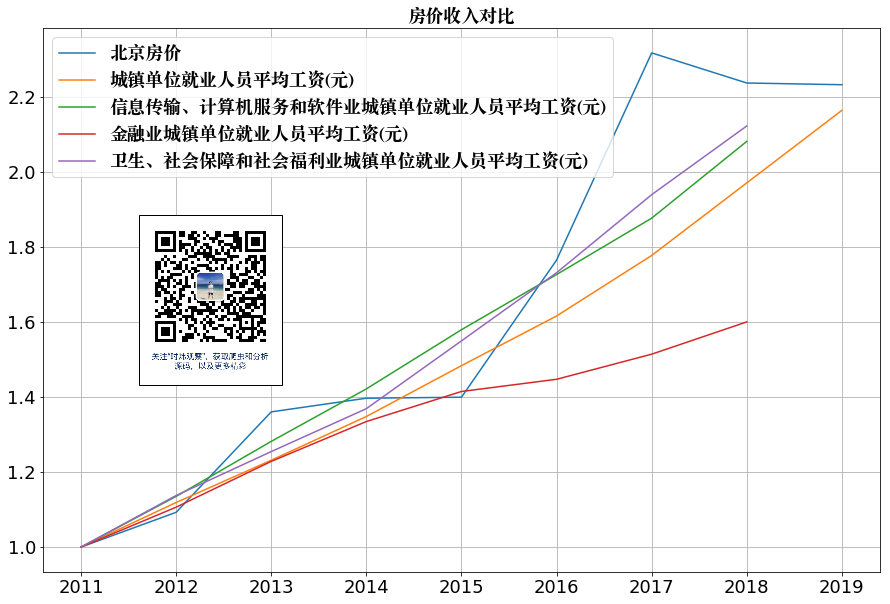

In [7]:
#北京房价相对涨幅与收入相对涨幅对比
import os
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.font_manager import FontProperties
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox
import matplotlib.image as mpimg

font=FontProperties(fname='font/Songti.ttc',size=18)
title = '房价收入对比'
columns = ['北京房价', '城镇单位就业人员平均工资(元)', 
           '信息传输、计算机服务和软件业城镇单位就业人员平均工资(元)','金融业城镇单位就业人员平均工资(元)',
          '卫生、社会保障和社会福利业城镇单位就业人员平均工资(元)']
plt.rcParams['font.sans-serif']=['SimHei']
matplotlib.rc('font', size=18)
matplotlib.rcParams['figure.figsize'] = [15, 10]
for col in columns:
    plt.plot(data[col]/data[col].iloc[0])
plt.legend(columns, prop = font)
plt.grid(True)
plt.title(title, fontproperties = font)
#插入二维码
x1,x2,y1,y2 = plt.axis()
qrcode = mpimg.imread('wechatqrcode.png')
imagebox = OffsetImage(qrcode, zoom=0.5)
x_pos = (x1 + 0.2*(x2 - x1))
y_pos = (y1 + 0.5*(y2-y1))
ab = AnnotationBbox(imagebox, (x_pos, y_pos ))
plt.gca().add_artist(ab)
print(x1, x2, y1, y2, x_pos, y_pos)

#重画x轴
dir_name = os.path.join('fig', '房价收入分析')
if not os.path.exists(dir_name):
    os.makedirs(dir_name)
plt.savefig(os.path.join(dir_name, title +'.png'))
plt.show()
plt.close()

In [11]:
#分析一下各行业涨幅对比
rise_ratio = income.loc['2018']/income.loc['2003']
pd.DataFrame({'涨幅':rise_ratio.sort_values(ascending = False)})

,涨幅
指标,
批发和零售业城镇单位就业人员平均工资(元),7.394070
教育城镇单位就业人员平均工资(元),6.510889
金融业城镇单位就业人员平均工资(元),6.248171
卫生、社会保障和社会福利业城镇单位就业人员平均工资(元),6.062280
科学研究、技术服务和地质勘查业城镇单位就业人员平均工资(元),6.033803
采矿业城镇单位就业人员平均工资(元),5.975563
城镇单位就业人员平均工资(元),5.899706
文化、体育和娱乐业城镇单位就业人员平均工资(元),5.767985
公共管理和社会组织城镇单位就业人员平均工资(元),5.726604


2.25 18.75 14435.099999999999 154022.9 3.9000000000000004 84229.0


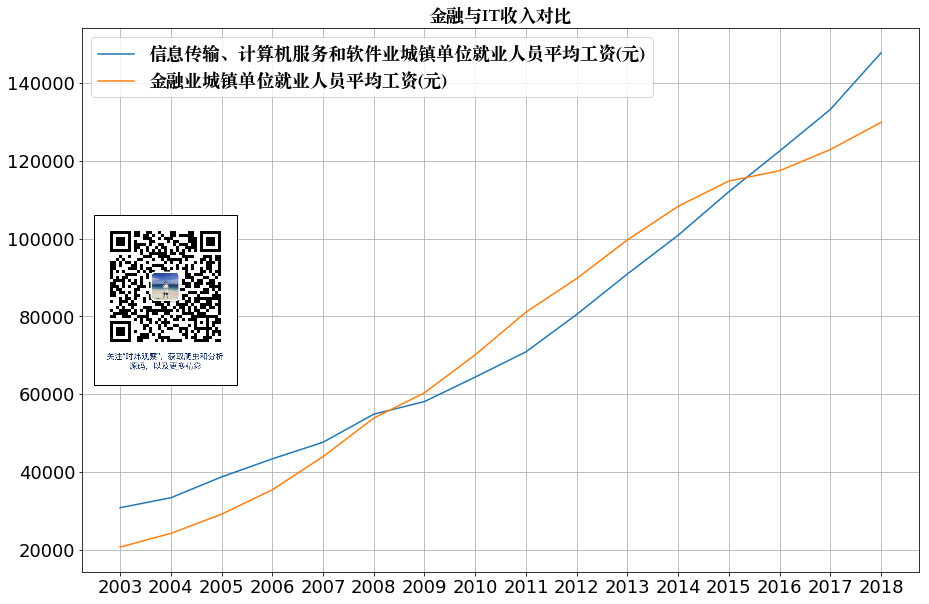

In [9]:
#金融与IT对比
font=FontProperties(fname='font/Songti.ttc',size=18)
title = '金融与IT收入对比'
columns = ['信息传输、计算机服务和软件业城镇单位就业人员平均工资(元)','金融业城镇单位就业人员平均工资(元)']
plt.rcParams['font.sans-serif']=['SimHei']
matplotlib.rc('font', size=18)
matplotlib.rcParams['figure.figsize'] = [15, 10]
for col in columns:
    plt.plot(income[col])
plt.legend(columns, prop = font)
plt.grid(True)
plt.title(title, fontproperties = font)

#插入二维码
x1,x2,y1,y2 = plt.axis()
qrcode = mpimg.imread('wechatqrcode.png')
imagebox = OffsetImage(qrcode, zoom=0.5)
x_pos = (x1 + 0.1*(x2 - x1))
y_pos = (y1 + 0.5*(y2-y1))
ab = AnnotationBbox(imagebox, (x_pos, y_pos ))
plt.gca().add_artist(ab)
print(x1, x2, y1, y2, x_pos, y_pos)

#重画x轴
dir_name = os.path.join('fig', '房价收入分析')
if not os.path.exists(dir_name):
    os.makedirs(dir_name)
plt.savefig(os.path.join(dir_name, title +'.png'))
plt.show()
plt.close()

In [50]:
rise = income.copy()
for col in rise.columns:
    for i in range(len(rise) - 1):
        rise[col].iloc[i+1] = '%.1f%%'%((income[col].iloc[i+1]/income[col].iloc[i]-1) * 100)
rise

指标,城镇单位就业人员平均工资(元),农、林、牧、渔业城镇单位就业人员平均工资(元),采矿业城镇单位就业人员平均工资(元),制造业城镇单位就业人员平均工资(元),电力、燃气及水的生产和供应业城镇单位就业人员平均工资(元),建筑业城镇单位就业人员平均工资(元),交通运输、仓储和邮政业城镇单位就业人员平均工资(元),信息传输、计算机服务和软件业城镇单位就业人员平均工资(元),批发和零售业城镇单位就业人员平均工资(元),住宿和餐饮业城镇单位就业人员平均工资(元),金融业城镇单位就业人员平均工资(元),房地产业城镇单位就业人员平均工资(元),租赁和商务服务业城镇单位就业人员平均工资(元),科学研究、技术服务和地质勘查业城镇单位就业人员平均工资(元),水利、环境和公共设施管理业城镇单位就业人员平均工资(元),居民服务和其他服务业城镇单位就业人员平均工资(元),教育城镇单位就业人员平均工资(元),卫生、社会保障和社会福利业城镇单位就业人员平均工资(元),文化、体育和娱乐业城镇单位就业人员平均工资(元),公共管理和社会组织城镇单位就业人员平均工资(元)
2000,9333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001,16.1%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%
2002,14.2%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%
2003,12.9%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%
2004,14.0%,8.9%,23.1%,12.5%,16.0%,11.0%,14.7%,8.3%,19.4%,12.7%,16.9%,8.1%,10.0%,14.2%,9.4%,8.0%,13.4%,13.6%,20.0%,13.1%
2005,14.3%,9.5%,21.9%,11.8%,14.9%,12.2%,15.7%,16.0%,17.2%,10.0%,20.3%,9.7%,13.4%,16.3%,11.2%,15.1%,13.5%,13.2%,10.5%,16.5%
2006,14.6%,12.9%,18.0%,14.4%,14.8%,14.5%,15.3%,11.9%,16.6%,9.8%,21.4%,9.8%,15.4%,16.5%,9.1%,14.5%,14.6%,13.4%,14.0%,11.4%
2007,18.5%,17.0%,16.8%,16.0%,17.8%,14.3%,15.7%,9.8%,18.4%,11.9%,24.0%,17.3%,13.5%,21.5%,17.6%,13.0%,23.9%,18.2%,17.7%,23.0%
2008,16.9%,15.8%,21.5%,15.4%,15.1%,14.8%,14.8%,15.1%,22.5%,13.3%,22.5%,15.5%,18.4%,18.4%,14.8%,12.2%,15.1%,15.4%,12.3%,16.5%
2009,11.6%,14.3%,11.1%,9.9%,8.7%,13.8%,10.2%,5.9%,12.9%,8.0%,12.1%,7.1%,7.8%,10.2%,9.7%,10.1%,15.8%,10.8%,10.5%,9.4%


In [51]:
prior_cols = ['城镇单位就业人员平均工资(元)',
              '信息传输、计算机服务和软件业城镇单位就业人员平均工资(元)',
                              '金融业城镇单位就业人员平均工资(元)',
              '卫生、社会保障和社会福利业城镇单位就业人员平均工资(元)',
                             '制造业城镇单位就业人员平均工资(元)',
                             '农、林、牧、渔业城镇单位就业人员平均工资(元)']
prior_cols.extend(list(set(rise.columns) - set(prior_cols)))
rise.loc[rise.index >='2004',prior_cols]

指标,城镇单位就业人员平均工资(元),信息传输、计算机服务和软件业城镇单位就业人员平均工资(元),金融业城镇单位就业人员平均工资(元),卫生、社会保障和社会福利业城镇单位就业人员平均工资(元),制造业城镇单位就业人员平均工资(元),农、林、牧、渔业城镇单位就业人员平均工资(元),居民服务和其他服务业城镇单位就业人员平均工资(元),水利、环境和公共设施管理业城镇单位就业人员平均工资(元),租赁和商务服务业城镇单位就业人员平均工资(元),科学研究、技术服务和地质勘查业城镇单位就业人员平均工资(元),公共管理和社会组织城镇单位就业人员平均工资(元),批发和零售业城镇单位就业人员平均工资(元),建筑业城镇单位就业人员平均工资(元),电力、燃气及水的生产和供应业城镇单位就业人员平均工资(元),文化、体育和娱乐业城镇单位就业人员平均工资(元),教育城镇单位就业人员平均工资(元),交通运输、仓储和邮政业城镇单位就业人员平均工资(元),住宿和餐饮业城镇单位就业人员平均工资(元),采矿业城镇单位就业人员平均工资(元),房地产业城镇单位就业人员平均工资(元)
2004,14.0%,8.3%,16.9%,13.6%,12.5%,8.9%,8.0%,9.4%,10.0%,14.2%,13.1%,19.4%,11.0%,16.0%,20.0%,13.4%,14.7%,12.7%,23.1%,8.1%
2005,14.3%,16.0%,20.3%,13.2%,11.8%,9.5%,15.1%,11.2%,13.4%,16.3%,16.5%,17.2%,12.2%,14.9%,10.5%,13.5%,15.7%,10.0%,21.9%,9.7%
2006,14.6%,11.9%,21.4%,13.4%,14.4%,12.9%,14.5%,9.1%,15.4%,16.5%,11.4%,16.6%,14.5%,14.8%,14.0%,14.6%,15.3%,9.8%,18.0%,9.8%
2007,18.5%,9.8%,24.0%,18.2%,16.0%,17.0%,13.0%,17.6%,13.5%,21.5%,23.0%,18.4%,14.3%,17.8%,17.7%,23.9%,15.7%,11.9%,16.8%,17.3%
2008,16.9%,15.1%,22.5%,15.4%,15.4%,15.8%,12.2%,14.8%,18.4%,18.4%,16.5%,22.5%,14.8%,15.1%,12.3%,15.1%,14.8%,13.3%,21.5%,15.5%
2009,11.6%,5.9%,12.1%,10.8%,9.9%,14.3%,10.1%,9.7%,7.8%,10.2%,9.4%,12.9%,13.8%,8.7%,10.5%,15.8%,10.2%,8.0%,11.1%,7.1%
2010,13.3%,10.8%,16.1%,12.8%,15.3%,16.4%,12.1%,10.3%,11.5%,12.4%,8.3%,15.4%,13.9%,13.0%,9.7%,12.8%,14.6%,12.1%,16.2%,11.3%
2011,14.4%,10.1%,15.6%,14.8%,18.6%,16.5%,17.6%,13.0%,18.7%,14.0%,10.0%,20.9%,16.6%,11.4%,15.6%,10.8%,16.3%,17.6%,18.2%,19.4%
2012,11.9%,13.5%,10.6%,13.8%,13.6%,16.5%,5.9%,12.0%,13.2%,7.8%,9.5%,14.0%,13.6%,10.4%,11.9%,10.5%,13.4%,13.8%,9.0%,9.2%
2013,10.1%,12.9%,11.0%,10.3%,11.5%,13.8%,9.4%,11.7%,17.6%,10.6%,6.9%,8.6%,15.3%,15.3%,10.8%,8.8%,8.6%,8.9%,5.6%,9.2%


In [25]:
income_t = income.loc[income.index>='2011']
income_t = income_t.transpose()
print(" "*22,'城镇单位就业人员平均工资(元)')
income_t.index = [x[:x.find('城镇单位就业人员平均工资(元)')] for x in income_t.index]
income_t.index = ["全行业" if x == "" else x for x in income_t.index]
income_t.sort_values('2017', ascending = False)

                       城镇单位就业人员平均工资(元)


,2019,2018,2017,2016,2015,2014,2013,2012,2011
信息传输、计算机服务和软件业,NaN,147678.0,133150.0,122478.0,112042.0,100845.0,90915.0,80510.0,70918.0
金融业,NaN,129837.0,122851.0,117418.0,114777.0,108273.0,99653.0,89743.0,81109.0
科学研究、技术服务和地质勘查业,NaN,123343.0,107815.0,96638.0,89410.0,82259.0,76602.0,69254.0,64252.0
电力、燃气及水的生产和供应业,NaN,100162.0,90348.0,83863.0,78886.0,73339.0,67085.0,58202.0,52723.0
卫生、社会保障和社会福利业,NaN,98118.0,89648.0,80026.0,71624.0,63267.0,57979.0,52564.0,46206.0
文化、体育和娱乐业,NaN,98621.0,87803.0,79875.0,72764.0,64375.0,59336.0,53558.0,47878.0
教育,NaN,92383.0,83412.0,74498.0,66592.0,56580.0,51950.0,47734.0,43194.0
租赁和商务服务业,NaN,85147.0,81393.0,76782.0,72489.0,67131.0,62538.0,53162.0,46976.0
公共管理和社会组织,NaN,87932.0,80372.0,70959.0,62323.0,53110.0,49259.0,46074.0,42062.0
交通运输、仓储和邮政业,NaN,88508.0,80225.0,73650.0,68822.0,63416.0,57993.0,53391.0,47078.0


In [2]:
income_yisheng = income['卫生、社会保障和社会福利业城镇单位就业人员平均工资(元)']
income_IT = income['信息传输、计算机服务和软件业城镇单位就业人员平均工资(元)']
start_year = 2003
end_year = 2018
#display(income_yisheng)
yishengRate = income_yisheng[str(end_year)]/income_yisheng[str(start_year)]
ITRate =  income_IT[str(end_year)]/income_IT[str(start_year)]
yishengBase = income_yisheng[str(end_year)]
ITBase = income_IT[str(end_year)]
print(yishengRate, ITRate, yishengBase, ITBase)


6.062279888785913 4.779687348286242 98118.0 147678.0


2044
2016.3 2053.7 -188513.03737050918 6117369.784780692 2020.04 2964428.373705092


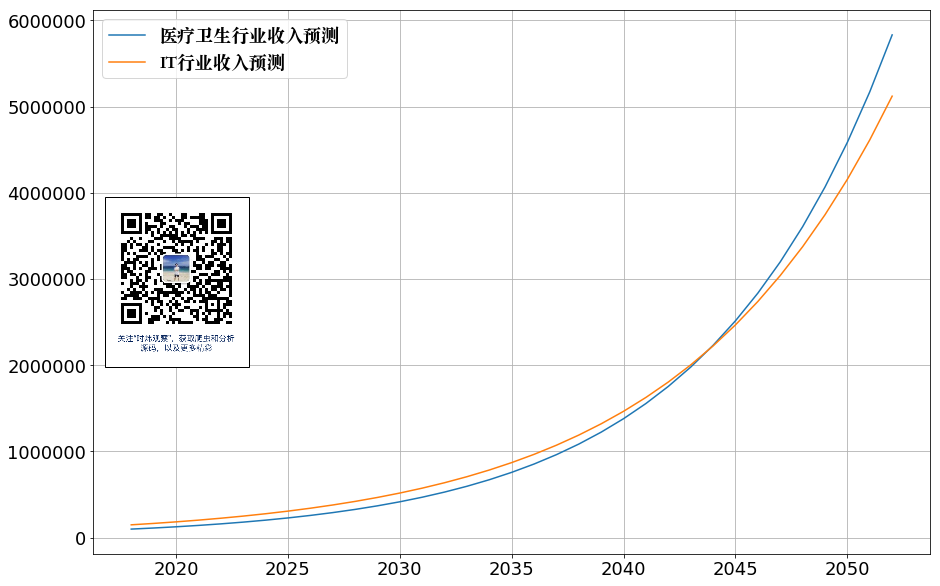

In [20]:
import os
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.font_manager import FontProperties
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox
import matplotlib.image as mpimg

'''
yishengRate = 2.228276 
ITRate = 2.066391
yishengBase = 89648.0
ITBase = 133150.0
'''
yishengYearRate = yishengRate**(1/(end_year- start_year))-1
ITYearRate = ITRate**(1/(end_year- start_year))-1
yishengYearRateStr, ITYearRateStr =  "%.2f%%"%(100*yishengYearRate), "%.2f%%"%(100*ITYearRate)
def f(base, rate, year):
    return base * rate **(year/(end_year-start_year))
count = 35
yisheng = [f(yishengBase, yishengRate, n) for n in range(count)]
IT = [f(ITBase, ITRate, n) for n in range(count)]
year = [end_year + n for n in range(count)]
cross_year = 'inf'
for i in range(len(year)):
    if yisheng[i]>IT[i]:
        print(year[i])
        cross_year = year[i]        
        break
font=FontProperties(fname='font/Songti.ttc',size=18)
plt.rcParams['font.sans-serif']=['SimHei']
matplotlib.rc('font', size=18)
matplotlib.rcParams['figure.figsize'] = [15, 10]
plt.plot(year, yisheng)
plt.plot(year, IT)
plt.legend(['医疗卫生行业收入预测', 'IT行业收入预测'],  prop = font)
#插入二维码
x1,x2,y1,y2 = plt.axis()
qrcode = mpimg.imread('wechatqrcode.png')
imagebox = OffsetImage(qrcode, zoom=0.5)
x_pos = (x1 + 0.1*(x2 - x1))
y_pos = (y1 + 0.5*(y2-y1))
ab = AnnotationBbox(imagebox, (x_pos, y_pos ))
plt.gca().add_artist(ab)
print(x1, x2, y1, y2, x_pos, y_pos)
plt.grid(True)
plt.show()

# 医疗行业收入什么时候超过IT
在美国等发达国家，医疗行业收入是比IT要高的。咱们来分析一下中国的情况。
根据 {{start_year}} 年到{{end_year}}年的涨幅，以及{{end_year}}年的基数预测，将来多少年之后医疗可以赶上IT。结论是大概{{cross_year}}年。
- {{start_year}}, {{end_year}} 医疗行业平均分别收入为{{income_yisheng[str(start_year)]}}, {{yishengBase}}, IT行业分别平均收入为{{income_IT[str(start_year)]}}, {{ITBase}}
- 从{{start_year}}到{{end_year}}, 医疗行业收入复合年增长率为{{yishengYearRateStr}}, IT行业收入复合年增长率为{{"%.2f%%"%(100*ITYearRate)}}
- 收入数据来自国家统计局官网 www.stats.gov.cn